# Scikit-Learn 1
## Basic Modeling

## Objectives
In line with the SK1 Tutorial, the objective of this practice notebook is to familiarize you with working with a regression problem using a `holdout` approach. The dataset under consideration is the `diamonds` dataset that comes with the `ggplot2` library in R.

The `diamonds` dataset contains information on diamonds including carat (numeric), clarity (categorical), cut (categorical), and color (categorical). The dataset has 10 features and 53940 instances. The objective is to predict the price of a diamond in USD given its attributes.

## Exercise 0: Data Preparation
Prepare the dataset for predictive modeling as follows:

- Refer to our data prep practice solutions on Canvas as well as our data prep script on GitHib here for some inspiration on preparing this data for predictive modeling.
- Set pd.set_option('display.max_columns', None). Read in the raw data, which is named as diamonds.csv on Canvas. Have a look at the shape and data types of the features. Also have a look at the top 5 rows.
- Generate descriptive statistics for categorical and numerical features separately.
- Have a look at the unique values for each categorical feature and check whether everything is OK in the sense that there are no unusual values.
- Make sure there are no missing values anywhere.
- Separate the last column from the dataset and set it to "target". Make sure "target" is a Pandas series at this point, and not a NumPy array (which will be necessary for the sampling below). Set all the other columns to be the "Data" data frame, which will be the set of descriptive features.
- Make sure all categorical descriptive features are encoded via one-hot-encoding. In this particular dataset, some categorical descriptive features are actually ordinal, but we will go ahead and encode them via one-hot-- encoding for simplicity.
- Make sure all descriptive features are scaled via min-max scaling and the output is a Pandas data frame with correct column names. Do NOT scale the target feature!
- Finally have a look at the top 5 rows of "target" and "Data" respectively.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('../data/diamonds.csv')
print(df.shape)
df.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [3]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [4]:
df.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [5]:
df.describe(include=np.number).round(3)

,carat,depth,table,x,y,z,price
count,53940.000,53940.000,53940.000,53940.000,53940.000,53940.000,53940.00
mean,0.798,61.749,57.457,5.731,5.735,3.539,3932.80
std,0.474,1.433,2.234,1.122,1.142,0.706,3989.44
min,0.200,43.000,43.000,0.000,0.000,0.000,326.00
25%,0.400,61.000,56.000,4.710,4.720,2.910,950.00
50%,0.700,61.800,57.000,5.700,5.710,3.530,2401.00
75%,1.040,62.500,59.000,6.540,6.540,4.040,5324.25
max,5.010,79.000,95.000,10.740,58.900,31.800,18823.00


In [6]:
categorical_cols = df.columns[df.dtypes==np.object].tolist()
categorical_cols

<ipython-input-6-07da6758eeb7>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_cols = df.columns[df.dtypes==np.object].tolist()


['cut', 'color', 'clarity']

In [7]:
for cat_col in categorical_cols:
    print('Column '+cat_col +':')
    print(df[cat_col].value_counts(),'\n')

Column cut:
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64 

Column color:
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 

Column clarity:
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64 



#### Checking for Missing Value

In [8]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Data Prepration

In [9]:
from sklearn import preprocessing

# last column as target feature
target = df.iloc[:,-1]

#everything else is Data, i.e., the set of descriptive features
Data = df.iloc[:, :-1]

# if a nominal feature has only 2 levels: encoding as a single binary
for col in categorical_cols:
    n = len(Data[col].unique())
    if n==2:
        Data[col] = pd.get_dummies(Data[col],drop_first=True)

        
#for categorical features with >2 levels: useing hot-encoding 
Data = pd.get_dummies(Data)
Data_cols=Data.columns

# Encoding
Data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(Data),
                    columns=Data_cols)

In [10]:
print(Data.shape)
Data.head()

(53940, 26)


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
print(target.shape)
target.head()

(53940,)


0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

# Exercise 1: Modeling Preparation

- Randomly sample 5000 rows as it's too big for a short demo (using a random seed of 999). Make sure to run reset_index(drop=True) on the sampled data to reset the indices.

    - **NOTE:** It's **extremely** important to use the same seed for both Data and target while sampling, otherwise you will happily mix and match different rows without getting any execution errors and all you results will be garbage.
    
- Split the sampled data as 70% training set and the remaining 30% test set using a random seed of 999.

In [12]:
Data_sample= Data.sample(n=5000,random_state=999).reset_index(drop=True)
Data_sample.shape

(5000, 26)

In [13]:
target_sample = target.sample(n=5000,random_state=999).reset_index(drop=True)
target_sample.shape

(5000,)

In [15]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data_sample.values,target_sample.values,
                                                   test_size=0.3,
                                                   random_state=999)

In [16]:
print(D_train.shape)
print(D_test.shape)
print(t_train.shape)
print(t_test.shape)

(3500, 26)
(1500, 26)
(3500,)
(1500,)


# Exercise 2
- Fit a nearest neighbor (NN) regressor with  k=3  neighbors using the Euclidean distance.
- Fit the model on the train data and evaluate its  R2  (the default "score()" for regressors) performance on the test data.

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3,p=2)
knn_regressor.fit(D_train,t_train)

score_knn = knn_regressor.score(D_test,t_test)

print(f'score_knn : {score_knn:.2f}')

score_knn : 0.83
0.8277702581929595


# Exercise 3
- Extend Question 2 by fitting  k=1,…,10  neighbors using the Manhattan and Euclidean distances respectively.
- What is the optimal  k  value for each distance metric? That is, at which  k , the NN regressor returns the highest  R2  score?
- Which distance metric seems to be better?

In [26]:
k_list = list(np.arange(1,11))

knn_score_manhattan=[]
knn_score_euclidean=[]

for k in k_list:
    knn_regressor_manhattan = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_regressor_manhattan.fit(D_train,t_train)
    knn_score_manhattan = knn_score_manhattan + [knn_regressor_manhattan.score(D_test,t_test)]
        
    knn_regressor_euclidean = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_regressor_euclidean.fit(D_train,t_train)
    knn_score_euclidean = knn_score_euclidean + [knn_regressor_euclidean.score(D_test,t_test)]

In [27]:
results = pd.DataFrame({'score_manhattan' : knn_score_manhattan,
                       'score_euclidean' : knn_score_euclidean},
                      index=k_list)
results

,score_manhattan,score_euclidean
1,0.835761,0.834437
2,0.840516,0.834388
3,0.830256,0.827770
4,0.809021,0.805942
5,0.784022,0.781398
6,0.750180,0.751187
7,0.725849,0.727718
8,0.706174,0.705348
9,0.690405,0.690273
10,0.676477,0.675774


No handles with labels found to put in legend.


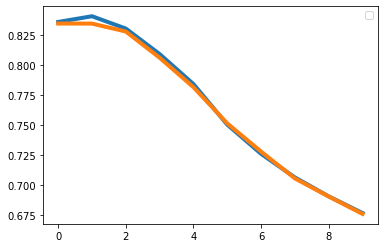

In [42]:
import matplotlib.pyplot as plt

x=knn_score_manhattan
y=knn_score_euclidean
plt.plot(x,lw=4)
plt.plot(y,lw=4)
plt.legend()

# Exercise 4
- Fit a decision tree regressor with default values on the train data, and then evaluate its performance on the test data.
- Does it perform better than the best KNN model from the previous question?

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(D_train,t_train)
dt_regressor.score(D_test,t_test)

0.9452800880582378

Yes, it did perform better that Knn

# Exercise 5
- Fit a simple linear regression model on train data, and then evaluate its performance on the test data. Hint: Use LinearRegression() in sklearn.linear_model.
- How does it compare to the previous models?

In [45]:
from sklearn.linear_model import LinearRegression

linera_regressor = LinearRegression()
linera_regressor.fit(D_train,t_train)
linera_regressor.score(D_test,t_test)

0.9333111179339317

LR score is near to Decision_tree_regressor

# Exercise 6
- Fit a random forest regressor with n_estimators=100 on train data, and then evaluate its performance on the test data.
- How does it compare to the previous models?

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(D_train,t_train)
rf_regressor.score(D_test,t_test)

0.9677210740707854

It has higest score till now.

# Exercise 7
- Predict the first 5 observations of the test data using the linear regression model you built earlier.
- Display your results as a data frame with three columns: 'target', 'prediction', 'absolute_diff'.
- How do the predictions look?

In [50]:
new_obs=D_test[0:5]

preds = linera_regressor.predict(new_obs)

results = pd.DataFrame({'target':t_test[0:5],
                       'prediction':preds})
results['absolute_diff'] = np.abs(results['target'] - results['prediction'])
results.round()

,target,prediction,absolute_diff
0,2919,4060.0,1141.0
1,912,1064.0,152.0
2,2365,2128.0,237.0
3,11666,10560.0,1106.0
4,1881,2290.0,409.0
